In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, joblib

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

RANDOM_STATE = 15

In [3]:
df = pd.read_csv("S06-hw-dataset-02.csv") 

print(df.info())
print(df.shape)
print(df['target'].value_counts(normalize=True))

X = df.drop(columns=['target', 'id'], errors='ignore')
y = df['target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [4]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [7]:
df.isna().sum()

id         0
f01        0
f02        0
f03        0
f04        0
f05        0
f06        0
f07        0
f08        0
f09        0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
f27        0
f28        0
f29        0
f30        0
f31        0
f32        0
f33        0
f34        0
f35        0
x_int_1    0
x_int_2    0
target     0
dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    stratify=y,
    random_state=RANDOM_STATE
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (13500, 37), Test shape: (4500, 37)


In [4]:
test_metrics = {}
search_summaries = {}
trained_models = {}

def fit_and_evaluate(model_name, model, param_grid, X_train, y_train, X_test, y_test):
    print(f"Training {model_name}...")
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    search_summaries[model_name] = {
        "best_params": grid.best_params_,
        "best_cv_score": grid.best_score_
    }
    trained_models[model_name] = best_model
    
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary') 
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    test_metrics[model_name] = {
        "accuracy": acc,
        "f1": f1,
        "roc_auc": roc
    }
    
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Test ROC-AUC: {roc}")
    print("-" * 30)

In [5]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
test_metrics['Dummy'] = {
    "accuracy": accuracy_score(y_test, y_pred_dummy),
    "f1": f1_score(y_test, y_pred_dummy, average='binary'), 
    "roc_auc": 0.5
}

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE))
])

params_lr = {'logreg__C': [0.01, 0.1, 1, 10]}
fit_and_evaluate("LogReg", pipe_lr, params_lr, X_train, y_train, X_test, y_test)

Training LogReg...
  Best Params: {'logreg__C': 10}
  Test ROC-AUC: 0.7935225387034164
------------------------------


In [6]:
params_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.05] 
}
fit_and_evaluate("DecisionTree", DecisionTreeClassifier(random_state=RANDOM_STATE), params_dt, X_train, y_train, X_test, y_test)

Training DecisionTree...
  Best Params: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 10}
  Test ROC-AUC: 0.8203435039761584
------------------------------


In [7]:
params_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5]
}
fit_and_evaluate("RandomForest", RandomForestClassifier(random_state=RANDOM_STATE), params_rf, X_train, y_train, X_test, y_test)

Training RandomForest...
  Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
  Test ROC-AUC: 0.9230364499030567
------------------------------


In [8]:
params_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
fit_and_evaluate("GradientBoosting", GradientBoostingClassifier(random_state=RANDOM_STATE), params_gb, X_train, y_train, X_test, y_test)

Training GradientBoosting...
  Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
  Test ROC-AUC: 0.9216691195744078
------------------------------


In [9]:
trained_models

{'LogReg': Pipeline(steps=[('scaler', StandardScaler()),
                 ('logreg', LogisticRegression(C=10, random_state=15))]),
 'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=15),
 'RandomForest': RandomForestClassifier(random_state=15),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=15)}

                  accuracy        f1   roc_auc
Dummy             0.737333  0.000000  0.500000
LogReg            0.810889  0.547581  0.793523
DecisionTree      0.839556  0.673007  0.820344
RandomForest      0.886000  0.739990  0.923036
GradientBoosting  0.892667  0.774825  0.921669
Best Model: RandomForest


<Figure size 800x600 with 0 Axes>

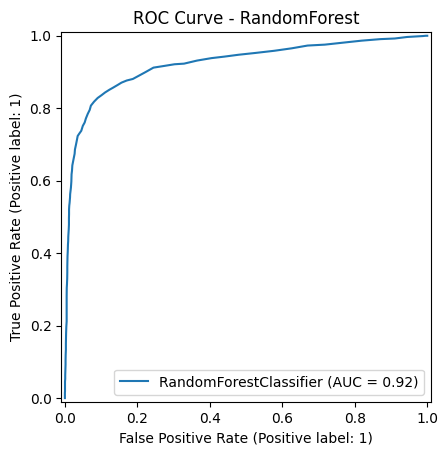

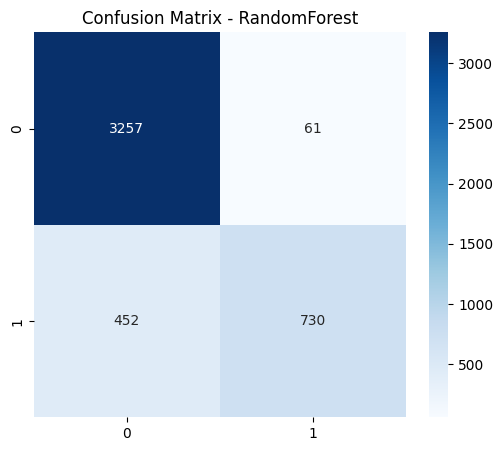

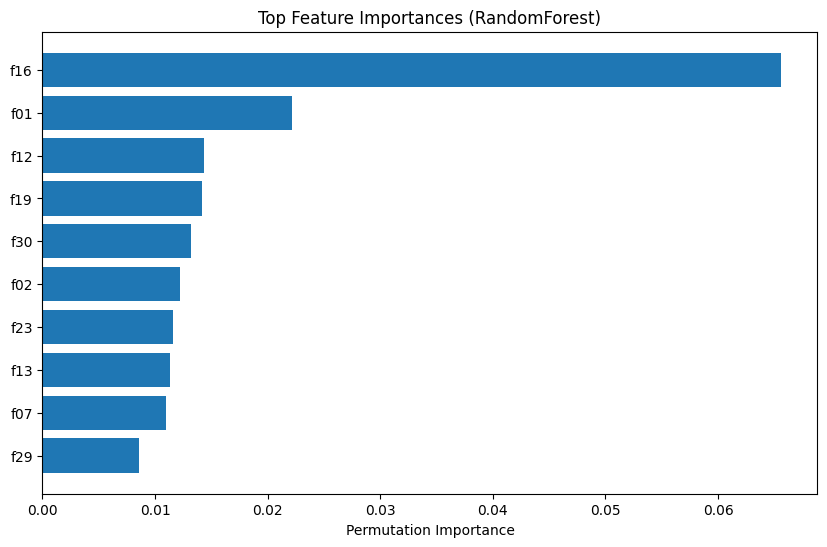

In [10]:
img_dir = "artifacts/figures"
results_df = pd.DataFrame(test_metrics).T
print(results_df)

best_model_name = results_df['roc_auc'].astype(float).idxmax()
best_model = trained_models[best_model_name]
print(f"Best Model: {best_model_name}")

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"ROC Curve - {best_model_name}")
plt.savefig(f"{img_dir}/roc_curve.png")
plt.show()

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.savefig(f"{img_dir}/confusion_matrix.png")
plt.show()

r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
sorted_idx = r.importances_mean.argsort()[::-1][:10] # Top 10

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], r.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title(f"Top Feature Importances ({best_model_name})")
plt.gca().invert_yaxis()
plt.savefig(f"{img_dir}/feature_importance.png")
plt.show()

In [11]:
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4)

joblib.dump(best_model, 'artifacts/best_model.joblib')

meta_info = {
    "model_name": best_model_name,
    "metrics": test_metrics[best_model_name],
    "params": search_summaries.get(best_model_name, {}).get("best_params")
}
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(meta_info, f, indent=4)